# Sentiment analysis for tweets on selected topics

To make sure we have enough tweets for our topic, the tweets are first tokenized and the most common tokens read - 3 topics are chosen from them.

In [34]:
import nltk
nltk.download('vader_lexicon', 'twitter_samples', 'stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sazerac/nltk_data...


True

In [71]:
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist

### This is a library we haven't seen before but is tremendously useful when running
### commands that take a while - just use tqdm() around any list or similar that you
### are iterating over to display a progress bar
from tqdm.auto import tqdm

# calling set() on all tweets removes duplicates
# since a set can only contain each element once
tweets = set(twitter_samples.strings())
tokenizer = TweetTokenizer()
topics = [ "Scotland", "work", "inequality", "cameron" ]

In [72]:
def tweets_to_fd(tweets):
    
    tokens = []
    for tweet in tqdm(tweets):
        tokens.extend(tokenizer.tokenize(tweet))
    
    english_stopwords = stopwords.words("english")
    
    ### Note the use of isalpha() to check if a
    ### string contains only text
    tokens = [ t for t in tokens 
               if t.isalpha()
               and len(t) > 1
               and t.lower() not in english_stopwords ]
    
    return FreqDist(tokens)

fd = tweets_to_fd(tweets)

  0%|          | 0/20416 [00:00<?, ?it/s]

In [73]:
def tweets_to_clusters(tweets, topics):
    """Given a list of tweets and a list n topic words, will return n lists of tweets
    containing the respective word"""
    
    topic_tweets = { topic : [] for topic in topics }
    
    for tweet in tqdm(tweets):
        tokens = [ t. lower() for t in tokenizer.tokenize(tweet) ]
        for topic in topics:
            if topic.lower() in tokens:
                topic_tweets[topic].append(tweet)
    
    return topic_tweets
            
topic_tweets = tweets_to_clusters(tweets, topics)

  0%|          | 0/20416 [00:00<?, ?it/s]

In [74]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def tweets_to_average_sentiment(tweets):
    positive_sum = 0
    negative_sum = 0
    for tweet in tqdm(tweets):
        scores = sia.polarity_scores(tweet)
        positive_sum += scores['pos']
        negative_sum += scores['neg']
        
    return positive_sum/len(tweets), negative_sum/len(tweets)

topic_sentiments = { topic: {} for topic in topics }
for topic in topics:
    posivite, negavite = tweets_to_average_sentiment(topic_tweets[topic])
    topic_sentiments[topic]["positive"] = posivite
    topic_sentiments[topic]["negative"] = negavite

  0%|          | 0/416 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/955 [00:00<?, ?it/s]

In [75]:
topic_sentiments

{'Scotland': {'positive': 0.08157932692307696,
  'negative': 0.07895673076923077},
 'work': {'positive': 0.1150443349753695, 'negative': 0.08616995073891626},
 'inequality': {'positive': 0.08100000000000002,
  'negative': 0.04377777777777778},
 'cameron': {'positive': 0.09523979057591606, 'negative': 0.06082617801047123}}

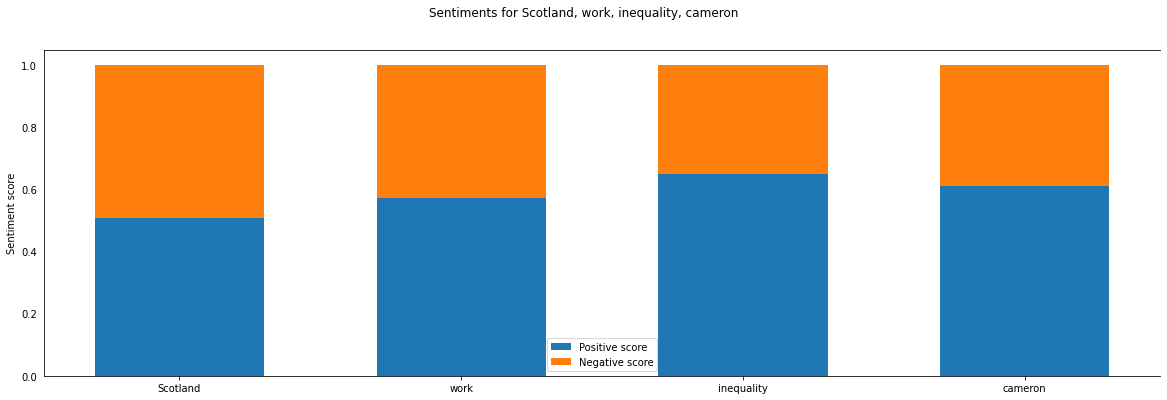

In [76]:
import matplotlib.pyplot as plt

positives = [ topic_sentiments[t]["positive"] for t in topics ]
negatives = [ topic_sentiments[t]["negative"] for t in topics ]

total = [ p + n for p, n in zip(positives, negatives) ]
positives = [ p/total[i] for i, p in enumerate(positives) ]
negatives = [ n/total[i] for i, n in enumerate(negatives) ]


bar_width = 0.6

figure, axes = plt.subplots(1, 1, figsize=(20,6), sharey=True)
axis = axes

figure.suptitle("Sentiments for {}".format(", ".join(topics)))
axis.bar(topics, positives, bar_width, label="Positive score")
axis.bar(topics, negatives, bar_width, label="Negative score", bottom=positives)


axis.set_ylabel("Sentiment score")
axis.legend()
axis.tick_params(left=False)

axis.spines['right'].set_visible(False)

plt.show()

Normalisation might not be necessarily a great idea here - it hides the *intensity* of the sentiment, which is quite low for all topics. Furthermore, this example illustrates how checking if a word appears in a tweet is only a crude measure for checking if the tweet is about that word, and whether the sentiment expressed in the tweet is about that word.